## Problem Statement:
The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyse the strength
of each input variable's correlation with each of the output variables in order to discover
the most strongly associated input variables. We need to estimate HL and CL, we can
compare a traditional linear regression approach to a sophisticated state-of-the-art
nonlinear non-parametric method, random forests.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_excel("ENB2012_data.xlsx")

In [3]:
## Change columns Names To better Understing
data.columns = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [4]:
data.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.tail()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [6]:
# Get Information About Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [7]:
# Check Null Values
data.isnull().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

In [8]:
# check Duplicet Values
data.duplicated().sum()

0

In [9]:
# check unique value in data
for i in data:
    print(i,data[i].unique())

relative_compactness [0.98 0.9  0.86 0.82 0.79 0.76 0.74 0.71 0.69 0.66 0.64 0.62]
surface_area [514.5 563.5 588.  612.5 637.  661.5 686.  710.5 735.  759.5 784.  808.5]
wall_area [294.  318.5 343.  416.5 245.  269.5 367.5]
roof_area [110.25 122.5  147.   220.5 ]
overall_height [7.  3.5]
orientation [2 3 4 5]
glazing_area [0.   0.1  0.25 0.4 ]
glazing_area_distribution [0 1 2 3 4 5]
heating_load [15.55  20.84  21.46  20.71  19.68  19.5   19.95  19.34  18.31  17.05
 17.41  16.95  15.98  28.52  29.9   29.63  28.75  24.77  23.93   6.07
  6.05   6.01   6.04   6.37   6.4    6.366  6.85   6.79   6.77   6.81
  7.18   7.1   10.85  10.54  10.77  10.56   8.6    8.49   8.45   8.5
 24.58  24.63  24.59  29.03  29.87  29.14  28.09  26.28  26.91  26.37
 25.27  23.53  24.03  23.54  22.58  35.56  37.12  36.9   35.94  32.96
 32.12  32.94  32.21  10.36  10.43  10.39  10.71  10.8   10.7   10.75
 11.11  11.13  11.09  11.16  11.68  11.69  11.7   15.41  15.2   15.42
 15.21  12.96  12.97  12.93  13.02  24.29 

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_compactness,768.0,0.764167,0.105777,0.62,0.6825,0.75,0.8300,0.98
surface_area,768.0,671.708333,88.086116,514.50,606.3750,673.75,741.1250,808.50
wall_area,768.0,318.500000,43.626481,245.00,294.0000,318.50,343.0000,416.50
roof_area,768.0,176.604167,45.165950,110.25,140.8750,183.75,220.5000,220.50
overall_height,768.0,5.250000,1.751140,3.50,3.5000,5.25,7.0000,7.00
orientation,768.0,3.500000,1.118763,2.00,2.7500,3.50,4.2500,5.00
glazing_area,768.0,0.234375,0.133221,0.00,0.1000,0.25,0.4000,0.40
glazing_area_distribution,768.0,2.812500,1.550960,0.00,1.7500,3.00,4.0000,5.00
heating_load,768.0,22.307195,10.090204,6.01,12.9925,18.95,31.6675,43.10
cooling_load,768.0,24.587760,9.513306,10.90,15.6200,22.08,33.1325,48.03


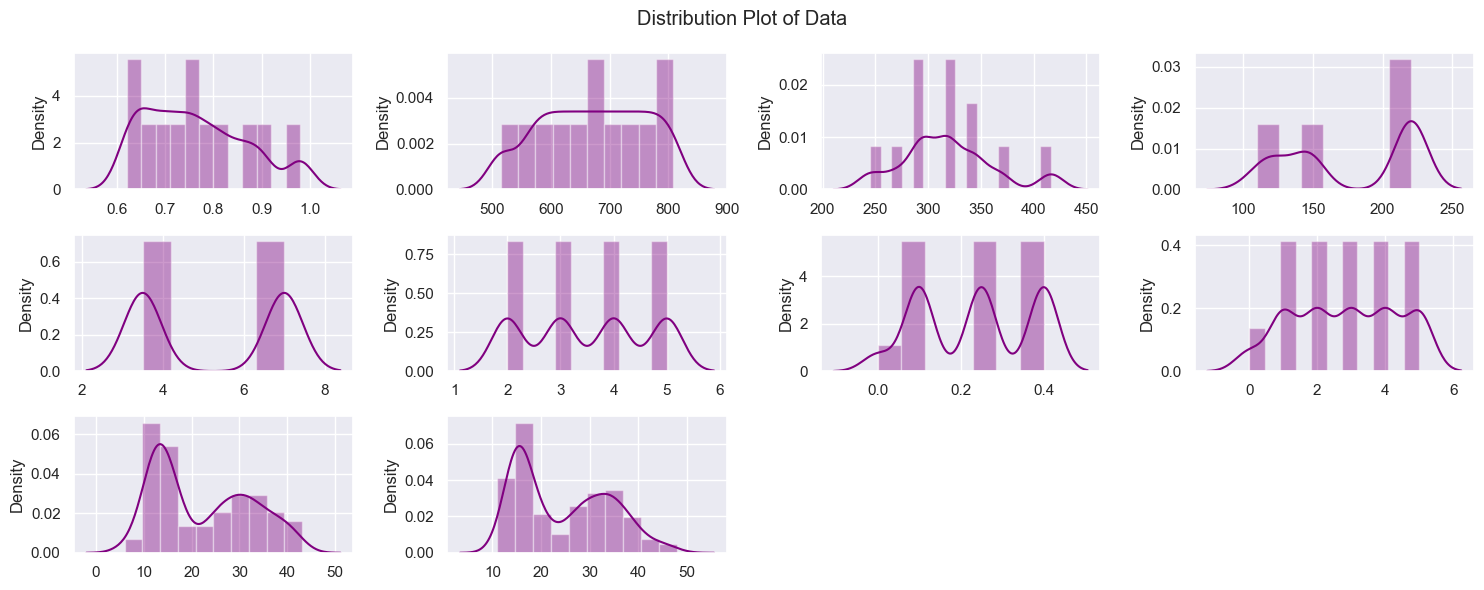

In [11]:
numerical_features = data.select_dtypes(exclude="object").columns
try:
    plt.suptitle("Distribution Plot of Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.distplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)
        

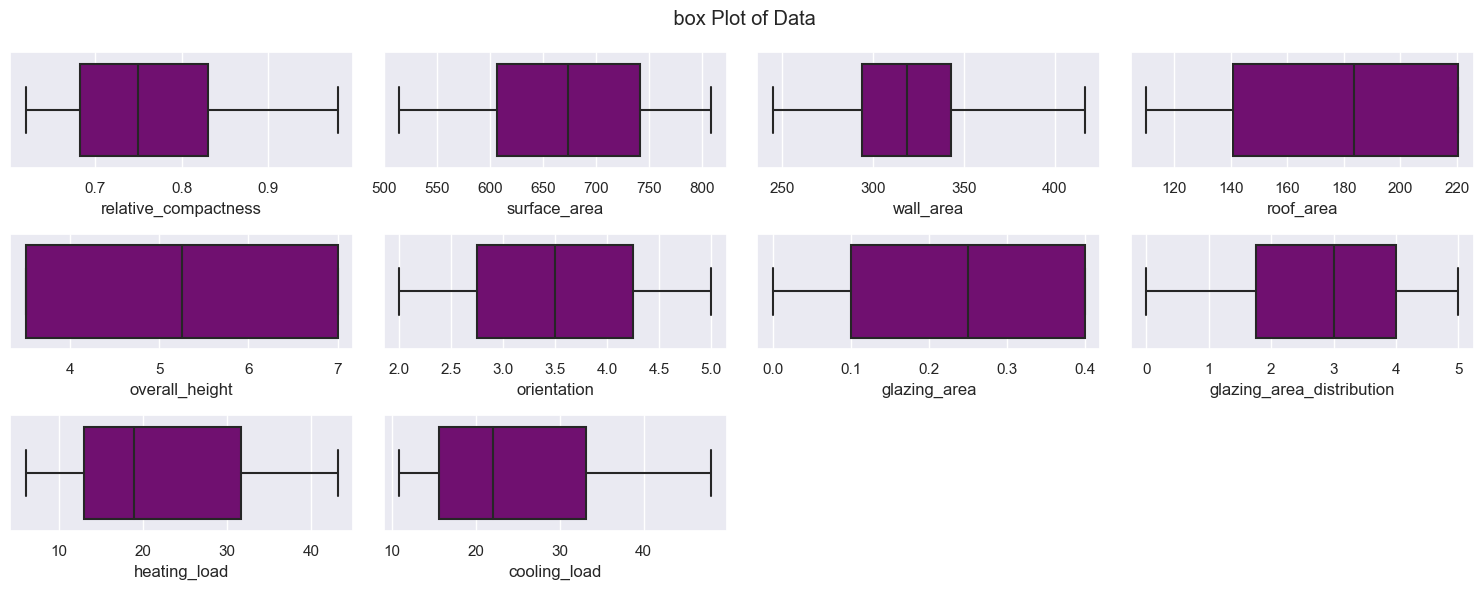

In [12]:
try:
    plt.suptitle(" box Plot of Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.boxplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

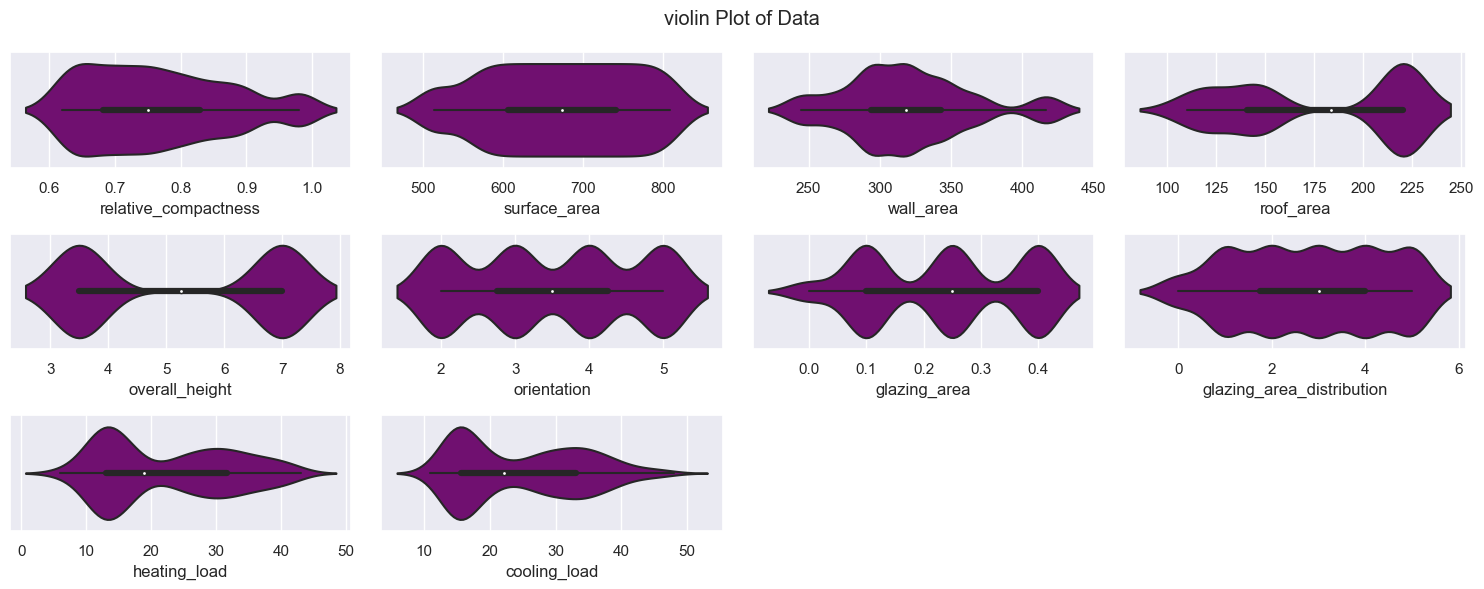

In [13]:
try:
    plt.suptitle("violin Plot of Data")
    for i in range(0,len(numerical_features)):
        plt.subplot(3,4,i+1)
        sns.violinplot(x=data[numerical_features[i]],color="purple")
        plt.tight_layout()
except Exception as e:
    print(e)

<AxesSubplot:>

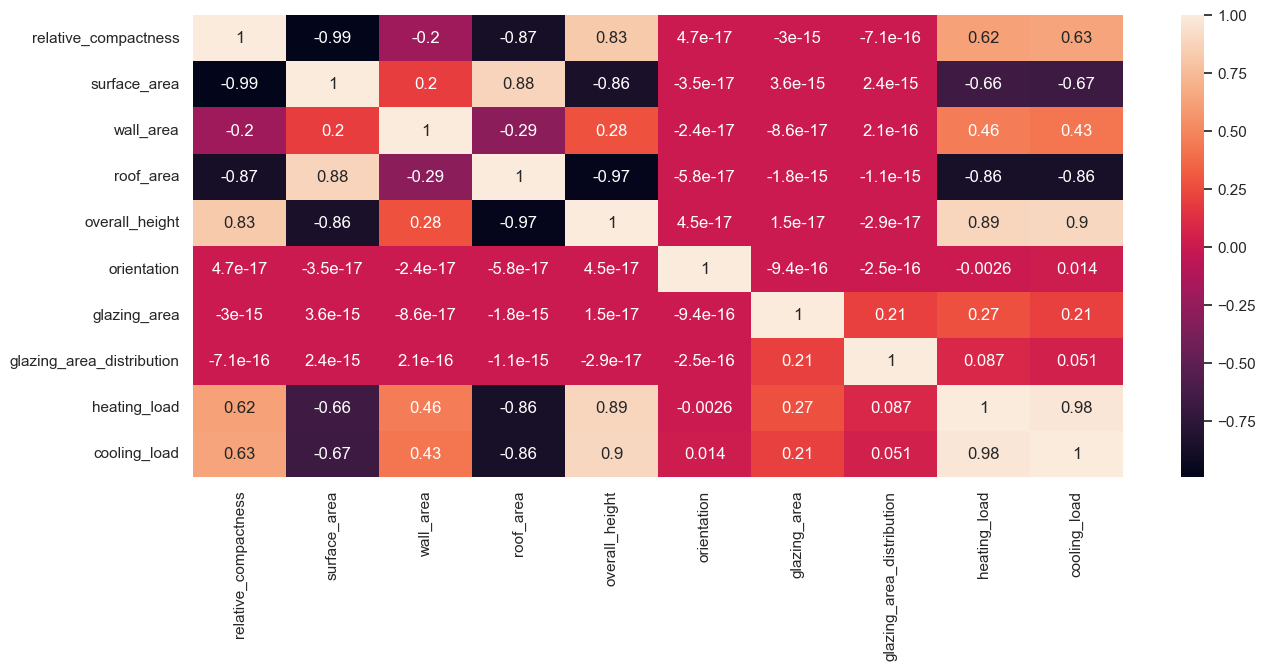

In [14]:
# Get The Correlation between targeted features
sns.heatmap(data.corr(),annot=True)

In [15]:
# # Drop Negatively Corelated Features
data.drop(["surface_area","roof_area"],axis=1,inplace=True)

## Model Traning

In [16]:
data

,relative_compactness,wall_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,294.0,7.0,2,0.0,0,15.55,21.33
1,0.98,294.0,7.0,3,0.0,0,15.55,21.33
2,0.98,294.0,7.0,4,0.0,0,15.55,21.33
3,0.98,294.0,7.0,5,0.0,0,15.55,21.33
4,0.90,318.5,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...
763,0.64,343.0,3.5,5,0.4,5,17.88,21.40
764,0.62,367.5,3.5,2,0.4,5,16.54,16.88
765,0.62,367.5,3.5,3,0.4,5,16.44,17.11
766,0.62,367.5,3.5,4,0.4,5,16.48,16.61


In [17]:
# Saprate Dependent And Independent Features
x = data.drop(["heating_load","cooling_load"],axis=1)
y = data[["heating_load","cooling_load"]]

In [18]:
numerical_features = x.select_dtypes(exclude="object").columns
print(numerical_features)

Index(['relative_compactness', 'wall_area', 'overall_height', 'orientation',
       'glazing_area', 'glazing_area_distribution'],
      dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
##Pipline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [20]:
## Numeric Pipline 
num_pipline = Pipeline(
    steps=[
        ("imputer",SimpleImputer(strategy="median")),
        ("scaler",StandardScaler())
    ]
)

# Preprocessor Object
preprocessor = ColumnTransformer([
    ("num_pipline",num_pipline,numerical_features)
])


In [21]:
# TraincTest Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 6)
(154, 6)
(614, 2)
(154, 2)


In [23]:
# Transform Data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [25]:
def model_evalution(test,predict):
    mse = mean_squared_error(test,predict)
    mae = mean_absolute_error(test,predict)
    rmse = np.sqrt(mse)
    r2score = r2_score(test,predict)
    return mse,mae,rmse,r2score

In [26]:
## Without Hyperameters
models = {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lesso":Lasso(),
    "Elastic":ElasticNet(),
    #"LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    # Make Prediction
    y_predict = model.predict(X_test)
    
    mse,mae,rmse,r2sore = model_evalution(y_test,y_predict)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print("Model Traning Performance")
    print("MSE",mse*100)
    print("MAE",mae*100)
    print("RMSE",rmse*100)
    print("R2",r2sore*100)
    print("="*40)
    r2_list.append(r2sore*100)
    y_predict_list.append(y_predict)
    trainig_score.append(score)

LinearRegression
Model Traning Performance
MSE 979.2305844646354
MAE 226.83572692479476
RMSE 312.92660233106346
R2 90.00256211639885
Ridge
Model Traning Performance
MSE 983.0789146056566
MAE 227.05971174880978
RMSE 313.5408928043767
R2 89.96254825585012
Lesso
Model Traning Performance
MSE 1308.8266779448136
MAE 265.1076610742256
RMSE 361.7770968351664
R2 86.6190665310627
Elastic
Model Traning Performance
MSE 2058.690279612885
MAE 348.67620416334717
RMSE 453.72792283623954
R2 78.99850061513251
DecisionTreeRegressor
Model Traning Performance
MSE 290.5389142857143
MAE 83.31298701298702
RMSE 170.45202089905368
R2 96.88473912589048
RandomForestRegressor
Model Traning Performance
MSE 199.94590834415547
MAE 76.49889610389602
RMSE 141.40223065572744
R2 97.85677608404156


In [27]:
trainig_score

[0.8982758439314111,
 0.8982467798554847,
 0.8672376005463626,
 0.7947623264971133,
 1.0,
 0.99707875667358]

In [28]:
# get the index of the best model
best_model_index = r2_list.index(max(r2_list))

# fetch the best model name and R2 score
best_model_name = model_list[best_model_index]
best_model_r2 = r2_list[best_model_index]

# print the best model name and R2 score
print(f"Best Model: {best_model_name}")
print(f"R2 Score: {best_model_r2}")

Best Model: RandomForestRegressor
R2 Score: 97.85677608404156


Text(0, 0.5, 'Predictions')

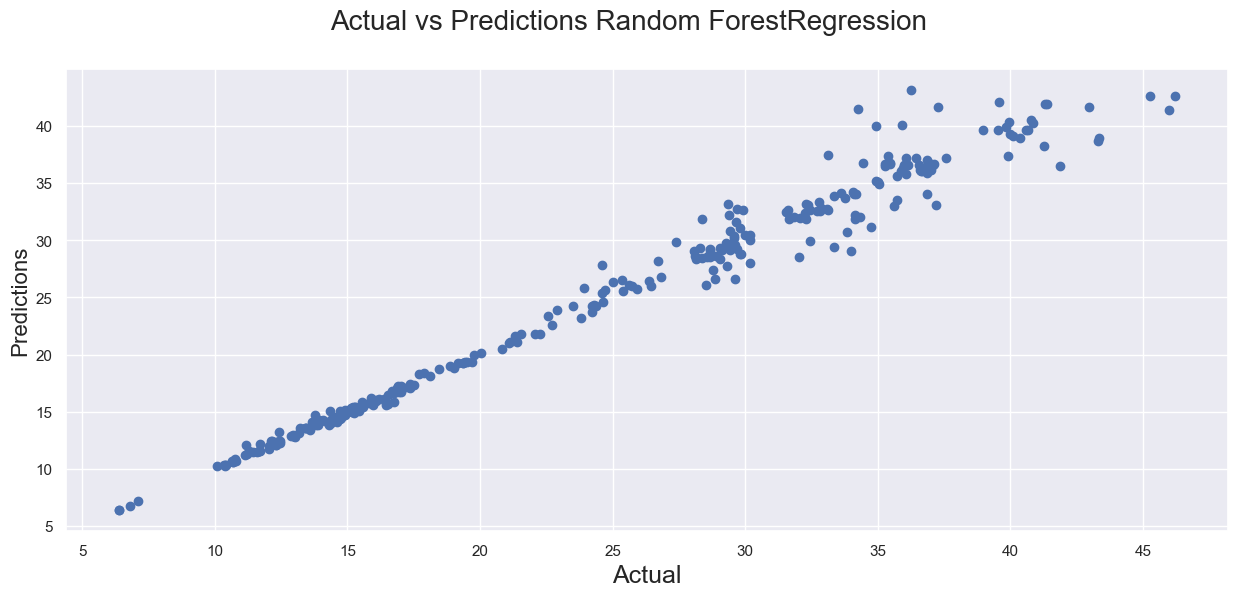

In [29]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[5])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [30]:
# HyperParamete Turning
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the models and their hyperparameters
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Elastic": ElasticNet(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor()
}

param_grids = {
    "Ridge": {"alpha": [0.1, 1, 10], "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]},
    "Lasso": {"alpha": [0.1, 1, 10], "max_iter": [1000, 5000, 10000]},
    "Elastic": {"alpha": [0.1, 1, 10], "l1_ratio": [0.2, 0.5, 0.8], "max_iter": [1000, 5000, 10000]},
    "DecisionTreeRegressor": {"max_depth": [2, 5, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]},
    "RandomForestRegressor": {"n_estimators": [100, 200], "max_depth": [2, 5, 10, None], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}
}

model_list = []
r2_list = []
y_predict_list = []
trainig_score = []

# Loop over the models and fit them to the training data
for model_name, model in models.items():
    print(model_name)
    param_grid = param_grids.get(model_name, {})
    grid = GridSearchCV(model, param_grid, scoring="r2", cv=5)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    best_params = grid.best_params_
    
    print("Best parameters:", best_params)
    
    # Make predictions using the best model
    y_pred = best_model.predict(X_test)
    mse, mae, rmse, r2 = model_evalution(y_test, y_pred)
    
    # Print the evaluation metrics
    print("Model Training Performance")
    print("MSE:", mse*100)
    print("MAE:", mae*100)
    print("RMSE:", rmse*100)
    print("R2 score:", r2*100)
    print("="*40)
    
    model_list.append(model_name)
    r2_list.append(r2*100)
    y_predict_list.append(y_pred)
    trainig_score.append(best_model.score(X_train, y_train))


LinearRegression
Best parameters: {}
Model Training Performance
MSE: 979.2305844646354
MAE: 226.83572692479476
RMSE: 312.92660233106346
R2 score: 90.00256211639885
Ridge
Best parameters: {'alpha': 0.1, 'solver': 'saga'}
Model Training Performance
MSE: 979.4048618869688
MAE: 226.90225211029266
RMSE: 312.9544474659162
R2 score: 90.0010158848232
Lasso
Best parameters: {'alpha': 0.1, 'max_iter': 1000}
Model Training Performance
MSE: 1035.2373027554038
MAE: 230.0460490258546
RMSE: 321.751037722554
R2 score: 89.42285160959382
Elastic
Best parameters: {'alpha': 0.1, 'l1_ratio': 0.8, 'max_iter': 1000}
Model Training Performance
MSE: 1055.8632487562488
MAE: 231.49966143107986
RMSE: 324.9404943610828
R2 score: 89.20335245592797
DecisionTreeRegressor
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Model Training Performance
MSE: 278.4570449683299
MAE: 90.95525664811382
RMSE: 166.87032239686297
R2 score: 97.0153707726784
RandomForestRegressor
Best parameters: {'m

In [31]:
trainig_score

[0.8982758439314111,
 0.8982745588757242,
 0.8957223670019756,
 0.8943647133980435,
 0.9879488494577755,
 0.985899037055311]

In [32]:
# get the index of the best model
best_model_index = r2_list.index(max(r2_list))

# fetch the best model name and R2 score
best_model_name = model_list[best_model_index]
best_model_r2 = r2_list[best_model_index]

# print the best model name and R2 score
print(f"Best Model: {best_model_name}")
print(f"R2 Score: {best_model_r2}")

Best Model: RandomForestRegressor
R2 Score: 97.82665119846506


Text(0, 0.5, 'Predictions')

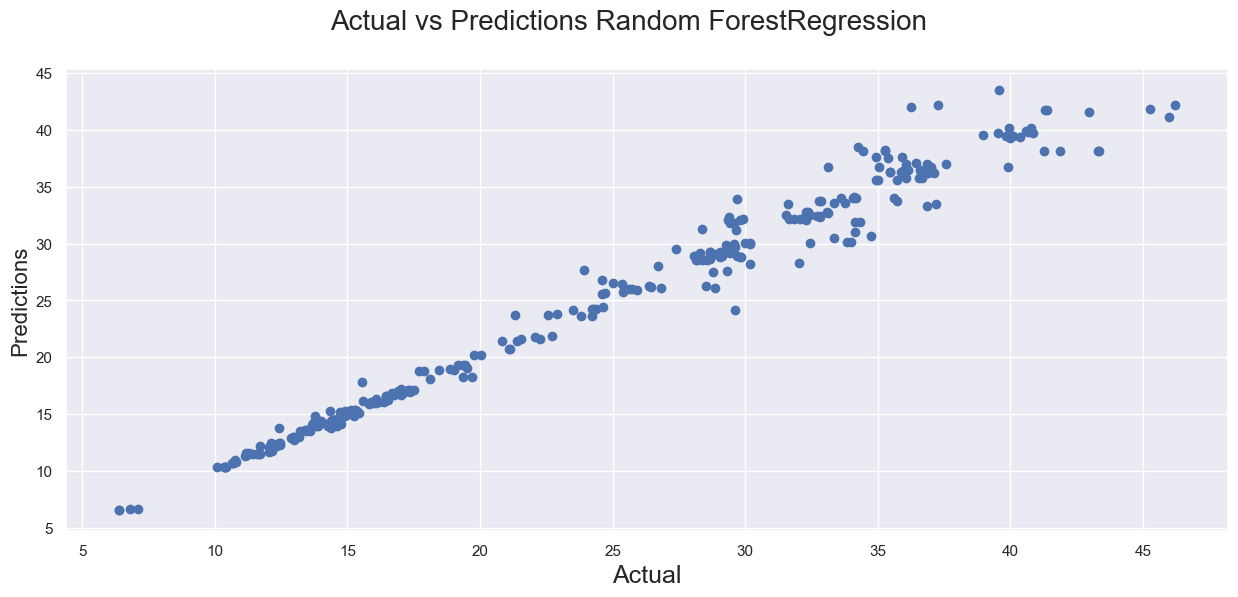

In [33]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_predict_list[5])
fig.suptitle('Actual vs Predictions Random ForestRegression', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16) 

In [34]:
arr = np.array(data)

In [35]:
arr[:, -2:]

array([[15.55, 21.33],
       [15.55, 21.33],
       [15.55, 21.33],
       ...,
       [16.44, 17.11],
       [16.48, 16.61],
       [16.64, 16.03]])

In [36]:
data.to_csv("CleanEnergyEfficiency.csv",index=False)

In [37]:
arr[:,:-2]

array([[  0.98, 294.  ,   7.  ,   2.  ,   0.  ,   0.  ],
       [  0.98, 294.  ,   7.  ,   3.  ,   0.  ,   0.  ],
       [  0.98, 294.  ,   7.  ,   4.  ,   0.  ,   0.  ],
       ...,
       [  0.62, 367.5 ,   3.5 ,   3.  ,   0.4 ,   5.  ],
       [  0.62, 367.5 ,   3.5 ,   4.  ,   0.4 ,   5.  ],
       [  0.62, 367.5 ,   3.5 ,   5.  ,   0.4 ,   5.  ]])